<a href="https://colab.research.google.com/github/mattdiep15/projects/blob/main/Loan_Prediciton_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

add later

## The Dataset
add later

## Python Libraries

**pandas** – for data cleaning, transformation, and analysis \
**seaborn** – for data visualization \

In [103]:
# load important packages & data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

loan_df = pd.read_csv('/content/drive/MyDrive/Projects/Datasets/Loan Prediction/loan_train.csv')

In [104]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [105]:
loan_df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [106]:
# imputing data
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace= True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace= True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace= True)
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace= True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace= True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace= True)

loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].median(), inplace= True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].median(), inplace= True)

# data cleaning
loan_df = loan_df[['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Property_Area', 'Loan_Status']]

loan_df['Loan_Status'] = loan_df['Loan_Status'].replace({'Y': 'Approved','N': 'Denied'})

<ipython-input-106-e3e6e0e9fe20>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace= True)
<ipython-input-106-e3e6e0e9fe20>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

## Univariate Analysis

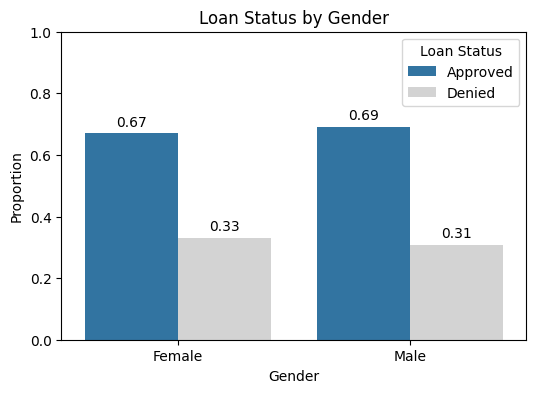

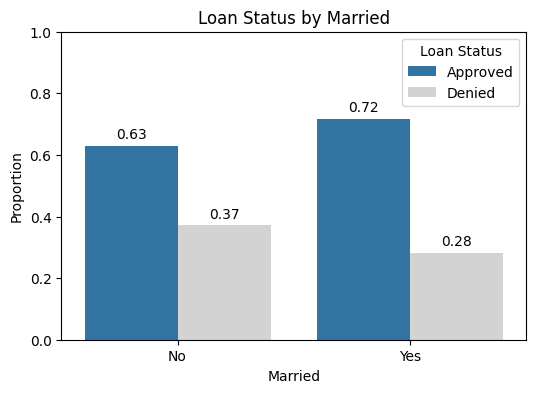

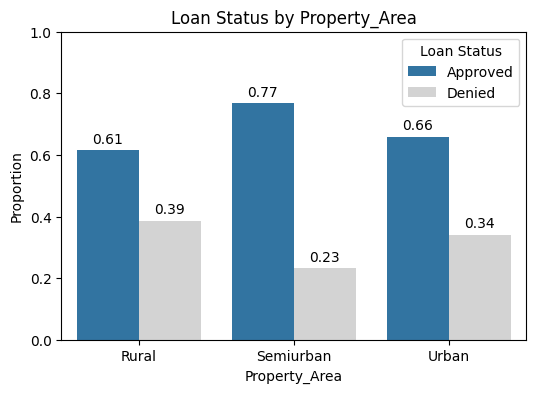

In [107]:
categories = ['Gender', 'Married', 'Property_Area']

for col in categories:
    prop_df = pd.crosstab(loan_df[col], loan_df['Loan_Status'], normalize= 'index')
    prop_df = prop_df.reset_index().melt(id_vars=col, var_name='Loan_Status', value_name='Proportion')

    plt.figure(figsize=(6, 4))
    plot= sns.barplot(
        data=prop_df,
        x=col,
        y='Proportion',
        hue='Loan_Status',
        palette= {'Approved': '#1f77b4', 'Denied': '#d3d3d3'}
        )

    for container in plot.containers:
        plot.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

    plt.title(f'Loan Status by {col}')
    plt.legend(title='Loan Status')
    plt.ylim(0, 1.00)

Text(39.31133294753084, 0.5, 'Loan Amount')

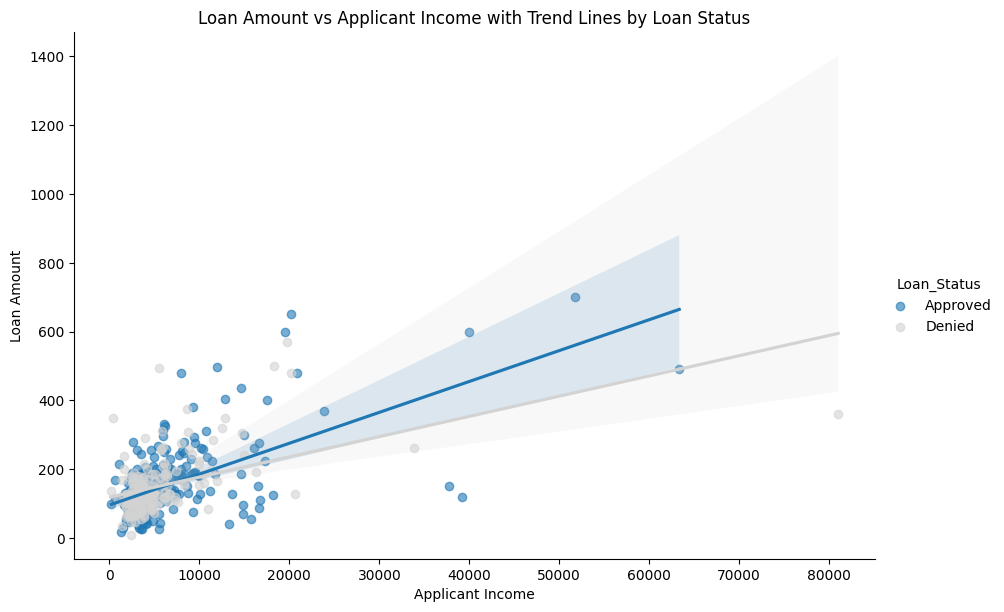

In [108]:
# income and loan amount
sns.lmplot(
    data= loan_df,
    x= 'ApplicantIncome',
    y= 'LoanAmount',
    hue= 'Loan_Status',
    palette= {'Approved': '#1f77b4', 'Denied': '#d3d3d3'},
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.6}
)

plt.title('Loan Amount vs Applicant Income with Trend Lines by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')

## Multivariate Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

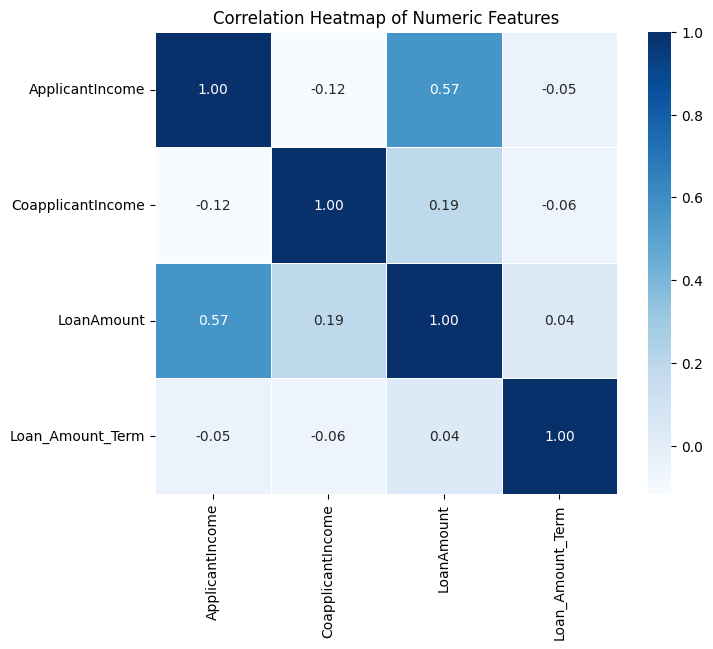

In [109]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
corr_matrix = loan_df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot = True,
    cmap= 'Blues',
    fmt='.2f',
    square=True,
    linewidths=0.5
    )

plt.title('Correlation Heatmap of Numeric Features')

In [110]:
loan_df.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,5849,0.0,128.0,360.0,Urban,Approved
1,Male,Yes,1,Graduate,4583,1508.0,128.0,360.0,Rural,Denied
2,Male,Yes,0,Graduate,3000,0.0,66.0,360.0,Urban,Approved
3,Male,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,Urban,Approved
4,Male,No,0,Graduate,6000,0.0,141.0,360.0,Urban,Approved


## Encoding Variables

In [111]:
binary_columns = ['Gender', 'Education', 'Married', 'Loan_Status']

ml_loan_df = pd.get_dummies(loan_df, columns= binary_columns, drop_first=True)

ml_loan_df.rename(columns={
    'Gender_Male': 'Male',
    'Education_Not Graduate': 'Not_Graduate',
    'Married_Yes': 'Married',
    'Loan_Status_Denied': 'Loan_Denied'
    }, inplace= True)

# replace 3+ in dependents with 3
ml_loan_df['Dependents'] = ml_loan_df['Dependents'].replace('3+', '3')

property_area_map ={
    'Rural': 1,
    'Urban': 2,
    'Semiurban': 3
}
ml_loan_df['Property_Area'] = ml_loan_df['Property_Area'].map(property_area_map)

# change T/F to 1/0
col_to_binary = ['Male', 'Not_Graduate', 'Married', 'Loan_Denied']
ml_loan_df[col_to_binary] = ml_loan_df[col_to_binary].astype(int)

In [112]:
ml_loan_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Male,Not_Graduate,Married,Loan_Denied
0,0,5849,0.0,128.0,360.0,2,1,0,0,0
1,1,4583,1508.0,128.0,360.0,1,1,0,1,1
2,0,3000,0.0,66.0,360.0,2,1,0,1,0
3,0,2583,2358.0,120.0,360.0,2,1,1,1,0
4,0,6000,0.0,141.0,360.0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1,0,0,0,0
610,3,4106,0.0,40.0,180.0,1,1,0,1,0
611,1,8072,240.0,253.0,360.0,2,1,0,1,0
612,2,7583,0.0,187.0,360.0,2,1,0,1,0


In [113]:
# splitting data
X = ml_loan_df.drop('Loan_Denied', axis=1)
y = ml_loan_df['Loan_Denied']

In [114]:
from sklearn.model_selection import train_test_split

# split into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    }

for name, model in models.items():
  model.fit(X_train, y_train)
  print(f'{name} accuracy: {model.score(X_test, y_test)}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.5609756097560976
Random Forest accuracy: 0.6666666666666666
Decision Tree accuracy: 0.5609756097560976


In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f'\n{name}')
  print(f'Accuracy  : {accuracy_score(y_test, y_pred):.3f}')
  print(f'Precision : {precision_score(y_test, y_pred):.3f}')
  print(f'Recall    : {recall_score(y_test, y_pred):.3f}')
  print(f'F1 Score  : {f1_score(y_test, y_pred):.3f}')
  print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression
Accuracy  : 0.561
Precision : 0.333
Recall    : 0.421
F1 Score  : 0.372
Confusion Matrix:
[[53 32]
 [22 16]]

Random Forest
Accuracy  : 0.626
Precision : 0.278
Recall    : 0.132
F1 Score  : 0.179
Confusion Matrix:
[[72 13]
 [33  5]]

Decision Tree
Accuracy  : 0.553
Precision : 0.282
Recall    : 0.289
F1 Score  : 0.286
Confusion Matrix:
[[57 28]
 [27 11]]



Logistic Regression (scaled)
Accuracy  : 0.553
Precision : 0.319
Recall    : 0.395
F1 Score  : 0.353
Confusion Matrix:
[[53 32]
 [23 15]]


,proportion
Loan_Denied,
0,0.686354
1,0.313646
